<a href="https://colab.research.google.com/github/zulfikarrahman30/PVCK_ZR/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah tingkat kecerahan citra dan kontras 
------------------------------------
Masukkan nilai Kecerahan: 50


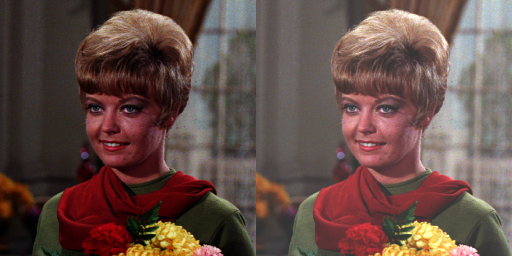

In [3]:
print(' Mengubah tingkat kecerahan citra dan kontras ')
print('------------------------------------')
try:
  brightness = int(input('Masukkan nilai Kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)


#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara single tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:75
Masukkan kontras [1.0 - 3.0]:2.0


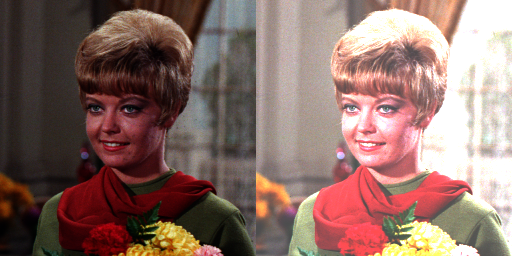

In [4]:
# 1
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukan nilai kecerahan: 30


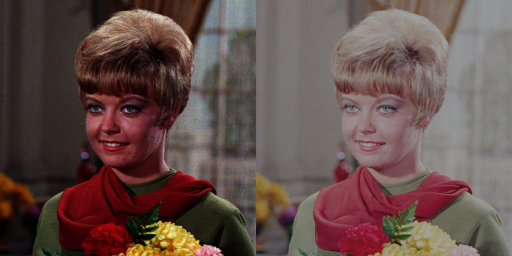

In [5]:
# 2
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  input('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

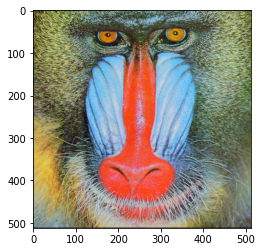

In [6]:
# 3
img = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

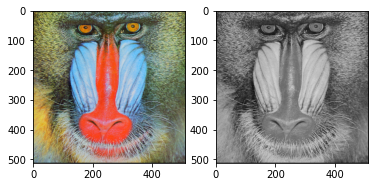

In [7]:
img_avg = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=10)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

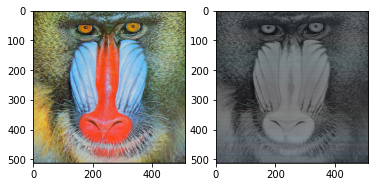

In [8]:
img_light = cv.imread('/content/drive/MyDrive/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1, keepdims=100)/2 + np.min(img_light,axis=-2, keepdims=100)/3
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

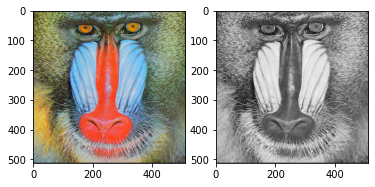

In [9]:
img_lum = cv.imread('/content/drive/MyDrive/mandrill.tiff')
R, G, B = img_lum[:,:,0], img_lum[:,:,1], img_lum[:,:,2]
gray_img_lum = (0.24 * R) + (0.77 * G) + (0.06 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap='gray')

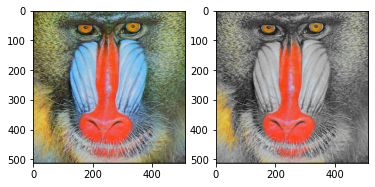

In [10]:
# 4
img_4 = cv.imread('/content/drive/MyDrive/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)
mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)
gray = cv.bitwise_and(img_4, 255 - mask3)
out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')